# Dataset preprocessing

The goal of the notebook is to preprocess data coming from the dataset, the steps are: 
- tokenization: ...
- vectorization: ...

In [16]:
import sys
sys.path.append("..")

from src.dataset import Dataset
import json
from pprint import pprint
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dataset = Dataset(dataset_path="../data/raw/data.jsonl", save_path="../data/processed/processed.jsonl")

In [68]:
data = dataset.process_lines()

In [4]:
dataset.save_json(data)

## Number of opinions per decades

In [41]:
freq = defaultdict(lambda : 0)

for el in data:
    year = el["decision_date"]//10 * 10
    freq[year] += len(el["opinions"])
    
op_year = sorted(list(freq.items()))

In [42]:
x = [e[0] for e in op_year]
y = [e[1] for e in op_year]

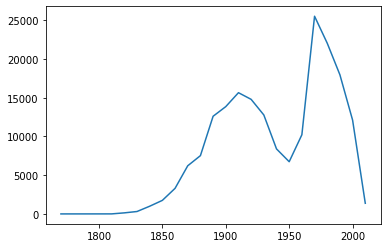

In [43]:
plt.plot(x, y)
plt.show()

## Opinions types

In [67]:
types = set([el["opinions"][i]["type"] for el in data for i in range(len(el["opinions"]))])
types

{'concurrence',
 'concurring-in-part-and-dissenting-in-part',
 'dissent',
 'majority',
 'rehearing',
 'remittitur',
 'unanimous'}